In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Load iris dataset
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [48]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
X = iris.data
y = iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [50]:
new_df = df.copy()
new_df['class'] = y

new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


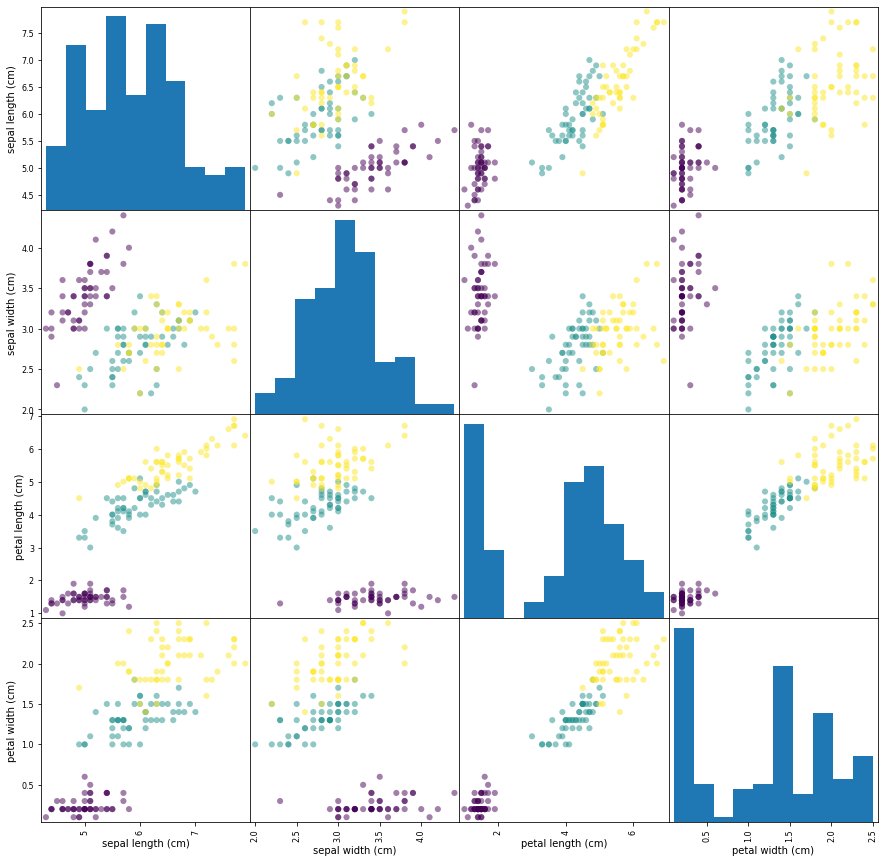

In [51]:
matrix_scatter = pd.plotting.scatter_matrix(df, c=y,figsize=(15,15), s= 150)

In [52]:
X = new_df.drop('class',axis=1) # feature
y = new_df['class'] #target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=1, stratify=y) #stratify biar balance

In [54]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

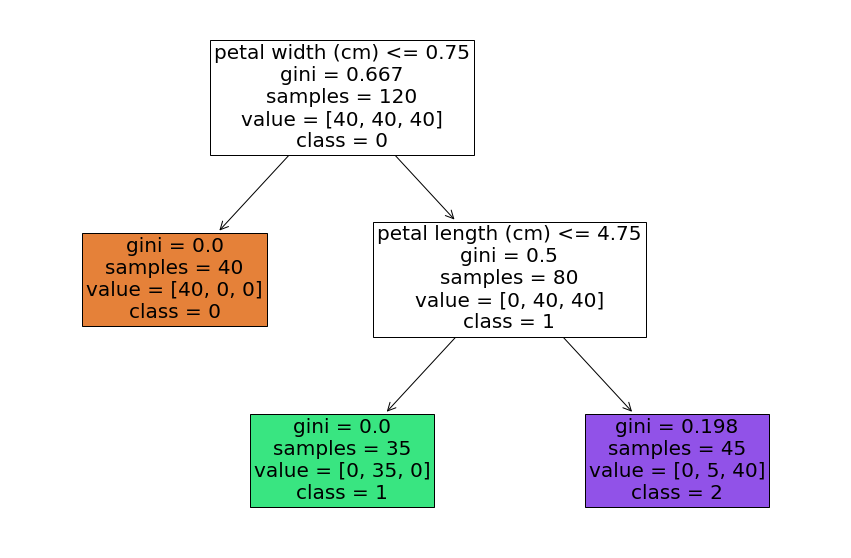

In [55]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,feature_names=X.columns,class_names=['0','1','2'],filled=True,fontsize=20)
plt.show()

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
dt_pred_train = dt.predict(X_train)
print('DT \n',classification_report(y_train,dt_pred_train))

DT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.88      0.93        40
           2       0.89      1.00      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [58]:
cm = confusion_matrix(y_train,dt_pred_train)
print(cm)

[[40  0  0]
 [ 0 35  5]
 [ 0  0 40]]


### Terhadap test

In [59]:
dt_pred_val =  dt.predict(X_test)
print(classification_report(y_test,dt_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [60]:
print('train', dt.score(X_train,y_train))
print('test', dt.score(X_test,y_test))

train 0.9583333333333334
test 0.9333333333333333


### Hyperparameter Tuning

In [66]:
params = {
    'criterion': ['gini','entropy'],
    'max_depth': np.arange(2,9),
    'min_samples_leaf': np.arange(1,5),
    'min_samples_split': np.arange(2,6)
}

In [67]:
dt_grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score = True)

dt_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5])},
             return_train_score=True, scoring='accuracy')

In [69]:
print('best params',dt_grid.best_params_)

best params {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [70]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=1)


In [73]:
dt_train_p = dt_best.predict(X_train)
dt_val_p = dt_best.predict(X_test)

In [75]:
print(classification_report(y_train,dt_train_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.97      0.94        40
           2       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [76]:
print(classification_report(y_test,dt_val_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [78]:
print(dt.score(X_train,dt_train_p))
print(dt.score(X_test,dt_val_p))

0.9333333333333333
0.9666666666666667


In [68]:
new_data = [[5.1,3.6,1.4,0.3]]
